In [15]:
import pandas as pd
df = pd.read_csv('Car_Data.csv')
df.head(5)


df['Brand'].unique()
df.isnull().any()
df.shape
df_1 = df.drop(df[df['Price'] > 1000000].index)
df_1.shape
df.corr()
 Data Cleaning
df.drop(columns=['ID'], inplace=True)



# Handle categorical variables
df = pd.get_dummies(df, columns=['Brand', 'Condition'], drop_first=True)

#EDA (Exploratory Data Analysis)


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score


features = ['Year', 'Mileage'] + [col for col in df.columns if col.startswith('Brand_') or col.startswith('Condition_')]
X = df[features]
y = df['Price']

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Building
model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'R2 Score: {r2:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')

#Feature Importance (for Linear Regression: Coefficients)
importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(importance.sort_values(by='Coefficient', ascending=False))

# Actual vs Predicted Prices
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison.head())



R2 Score: -0.00
Mean Absolute Error: 18753.40
                Feature  Coefficient
8            Brand_Jeep    20.439763
0                  Year    18.006065
1               Mileage    -0.000866
21       Condition_Used   -25.000536
6         Brand_Hyundai   -29.264430
2             Brand_BMW   -29.698651
16         Brand_Subaru  -137.589120
12          Brand_Mazda  -174.514985
10     Brand_Land Rover  -212.399061
15        Brand_Porsche  -242.096877
7          Brand_Jaguar  -271.607470
11          Brand_Lexus  -370.039454
3       Brand_Chevrolet  -450.283380
18         Brand_Toyota  -509.082040
17          Brand_Tesla  -617.900760
14         Brand_Nissan  -674.672388
9             Brand_Kia  -690.713822
13  Brand_Mercedes-Benz  -700.166422
19     Brand_Volkswagen  -701.136200
4            Brand_Ford  -833.723099
5           Brand_Honda  -838.373626
20          Brand_Volvo  -951.407863
       Actual     Predicted
75721   16890  42218.988606
80184   23880  43048.384776
19864   36750  4226

In [16]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print(f'Random Forest R² Score: {r2_rf:.2f}')
print(f'Random Forest MAE: {mae_rf:.2f}')


Random Forest R² Score: -0.12
Random Forest MAE: 19519.97


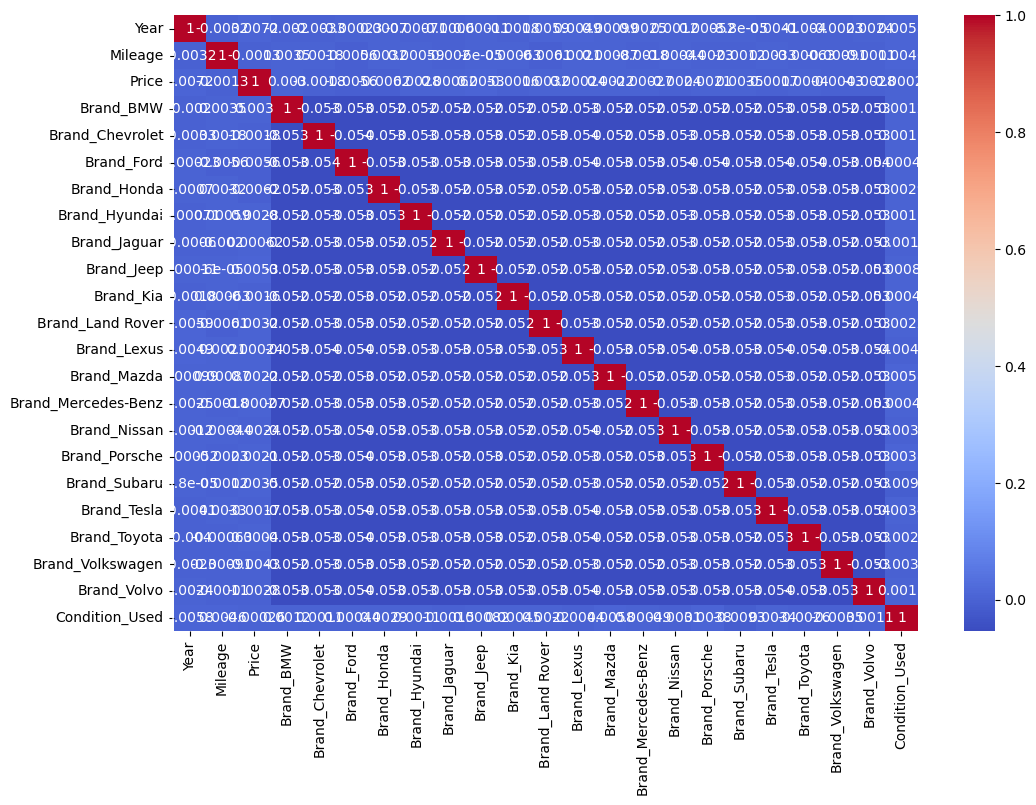

In [17]:
# Check correlation matrix 
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


In [21]:
df.head()


# Drop highly correlated features
#df = df.drop(columns=['Honda', 'Ford'])  # Example: dropping two features

#df['Mileage_Condition'] = df['Mileage'] * df['Condition_Used']



,Model,Year,Color,Mileage,Price,Brand_BMW,Brand_Chevrolet,Brand_Hyundai,Brand_Jaguar,Brand_Jeep,...,Brand_Mazda,Brand_Mercedes-Benz,Brand_Nissan,Brand_Porsche,Brand_Subaru,Brand_Tesla,Brand_Toyota,Brand_Volkswagen,Brand_Volvo,Condition_Used
0,Generic Model 3,2003,Blue,22932,65732,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,Generic Model 2,2003,Silver,89937,58620,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Generic Model 2,2022,Green,36616,50574,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Generic Model 2,1997,Black,82812,35436,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,Generic Model 3,2000,Black,184616,63880,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [22]:
import pandas as pd


df = pd.read_csv('Car_Data.csv')  # Load your data

# To calculate the standard deviation of a specific column:
std_dev_price = df['Price'].std()  # Standard deviation of 'Price'
std_dev_mileage = df['Mileage'].std()  # Standard deviation of 'Mileage'


print(f"Standard Deviation of Price: {std_dev_price}")
print(f"Standard Deviation of Mileage: {std_dev_mileage}")


std_dev_all = df.std()  
print("Standard Deviation of all numeric columns:")
print(std_dev_all)


Standard Deviation of Price: 21632.29669205622
Standard Deviation of Mileage: 57710.08705839595
Standard Deviation of all numeric columns:
ID         28867.657797
Year           9.527220
Mileage    57710.087058
Price      21632.296692
dtype: float64


/var/folders/fk/8n7fj3516fj8jwzf4b88dn5r0000gn/T/ipykernel_23005/3105130599.py:15: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  std_dev_all = df.std()  # Calculate std for all columns
